In [3]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

#### Superimposes a cartoon image over the detected face.

In [4]:
# Load the mask image
mask = cv2.imread('dexter.jpg')

# Initialize video capture and cascade classifiers for face and eyes detection
video_capture = cv2.VideoCapture(0)
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('cartoon_face.mp4', fourcc, 20.0, (640, 480))

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()
    if not ret:
        break
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,
                                         scaleFactor=1.1,
                                         minNeighbors=5,
                                         minSize=(60, 60),
                                         flags=cv2.CASCADE_SCALE_IMAGE)
    for (x, y, w, h) in faces:
        # Get the face region
        faceROI = frame[y:y+h, x:x+w]
        
        # Resize the mask image to match the size of the face region
        resized_mask = cv2.resize(mask, (w, h))
        
        # Place the resized mask image over the face region
        frame[y:y+h, x:x+w] = resized_mask
        
        # Detect eyes within the face region
        eyes = eyeCascade.detectMultiScale(faceROI)
        for (x2, y2, w2, h2) in eyes:
            eye_center = (x + x2 + w2 // 2, y + y2 + h2 // 2)
            radius = int(round((w2 + h2) * 0.25))
            frame = cv2.circle(frame, eye_center, radius, (0, 0, 255), 4)

    # Write the frame to the output video
    out.write(frame)

    # Display the resulting frame
    cv2.imshow('Face Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

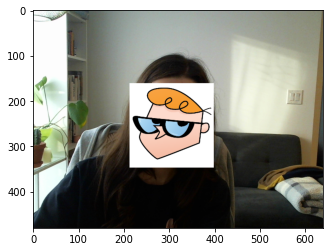

In [5]:
frame2 = frame[:,:,::-1] #to convert from CV2 BGR format to RGB for matplotlib

plt.imshow(frame2)
plt.show()

In [7]:
# Release video capture, video writer, and close all OpenCV windows
video_capture.release()
out.release()
cv2.destroyAllWindows()